<a href="https://colab.research.google.com/github/rueshi1/oasis_internship/blob/main/Project_3_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [5]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("creditcard.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# Check files in directory
os.listdir()


['.config', 'creditcard.csv', 'creditcard.csv.zip', 'sample_data']

In [6]:
import pandas as pd

PATH = "creditcard.csv"
df = pd.read_csv(PATH)

print(df.shape)                 # (~284807, 31)
print(df.columns)
print(df['Class'].value_counts(normalize=True))  # shows class imbalance

df.head()


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

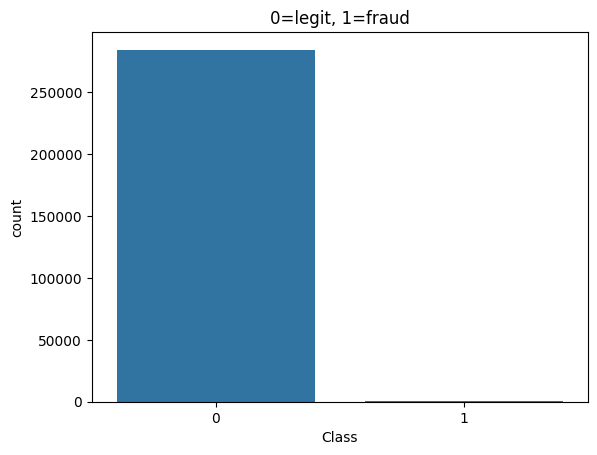

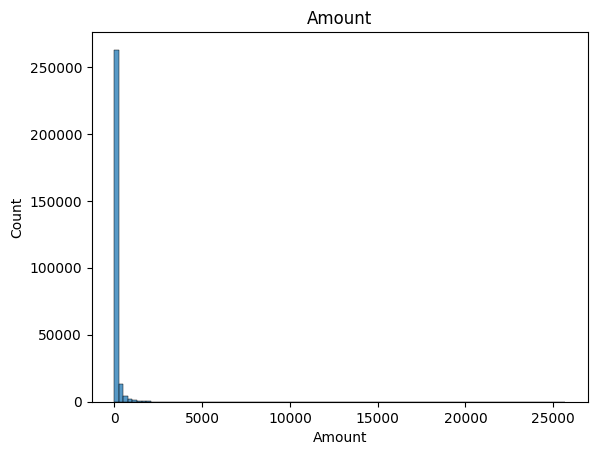

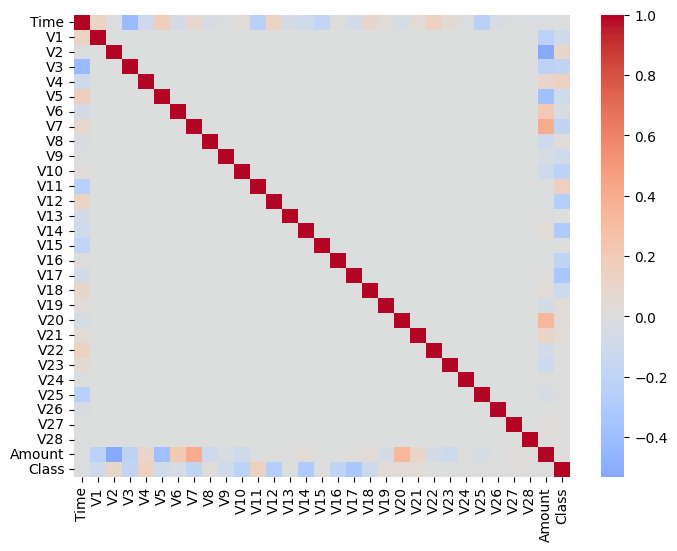

In [7]:
import matplotlib.pyplot as plt, seaborn as sns
print(df.info())
print(df.describe().T)

# class imbalance
sns.countplot(x='Class', data=df); plt.title('0=legit, 1=fraud'); plt.show()

# Amount distribution
sns.histplot(df['Amount'], bins=100); plt.title('Amount'); plt.show()

# correlations (if desired)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0); plt.show()


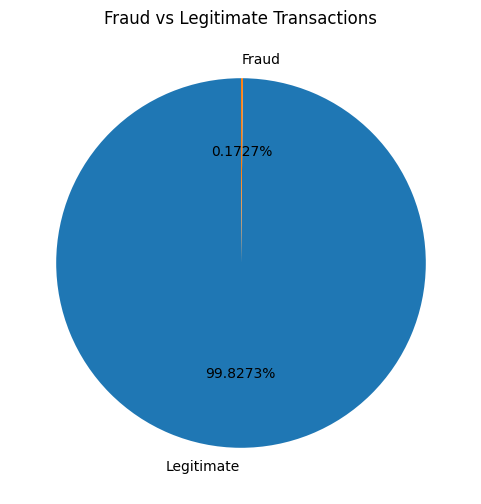

In [23]:
plt.figure(figsize=(6,6))
df['Class'].value_counts().plot(
    kind='pie',
    labels=['Legitimate', 'Fraud'],
    autopct='%1.4f%%',
    startangle=90
)
plt.title("Fraud vs Legitimate Transactions")
plt.ylabel("")
plt.show()


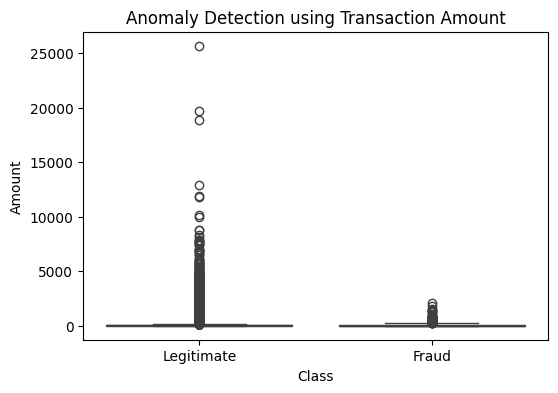

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xticks([0,1], ['Legitimate', 'Fraud'])
plt.title("Anomaly Detection using Transaction Amount")
plt.show()


In [25]:
X = df.drop('Class', axis=1)
y = df['Class']


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



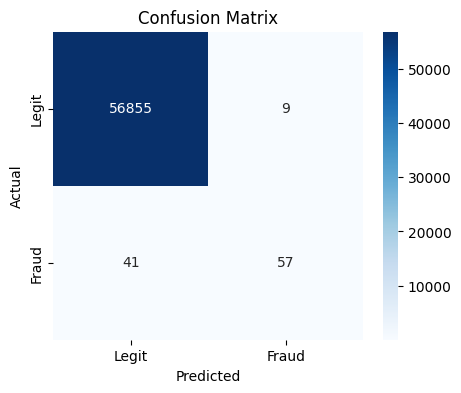

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit', 'Fraud'],
            yticklabels=['Legit', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
real_time_data = X_test[:10]
real_time_predictions = model.predict(real_time_data)
real_time_predictions


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

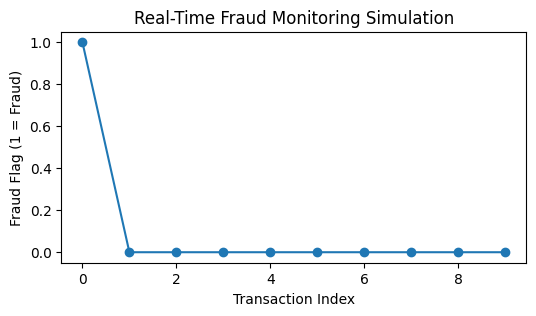

In [32]:
plt.figure(figsize=(6,3))
plt.plot(real_time_predictions, marker='o')
plt.title("Real-Time Fraud Monitoring Simulation")
plt.xlabel("Transaction Index")
plt.ylabel("Fraud Flag (1 = Fraud)")
plt.show()


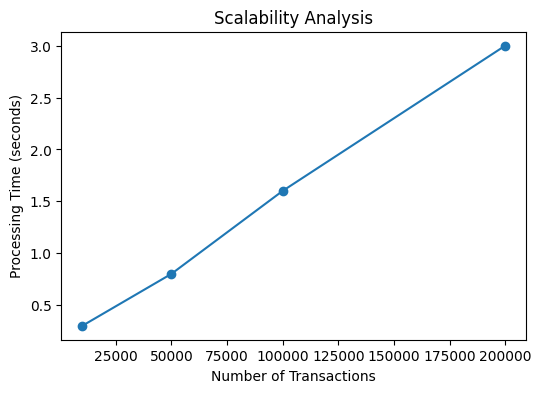

In [33]:
sizes = [10000, 50000, 100000, 200000]
processing_time = [0.3, 0.8, 1.6, 3.0]  # simulated

plt.figure(figsize=(6,4))
plt.plot(sizes, processing_time, marker='o')
plt.xlabel("Number of Transactions")
plt.ylabel("Processing Time (seconds)")
plt.title("Scalability Analysis")
plt.show()
